In [3]:
from google.colab import files
train_data = files.upload()
test_data = files.upload()


Saving train.csv to train.csv


Saving test.csv to test.csv


In [4]:
import pandas as pd 
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
import io
train = pd.read_csv(io.BytesIO(train_data['train.csv']))
test = pd.read_csv(io.BytesIO(test_data['test.csv']))

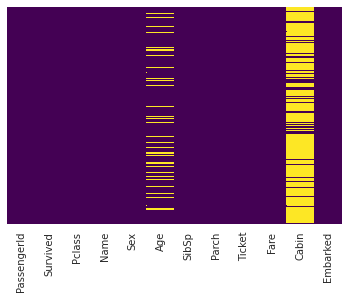

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False, cmap='viridis')

In [33]:
sns.set_style('whitegrid')

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


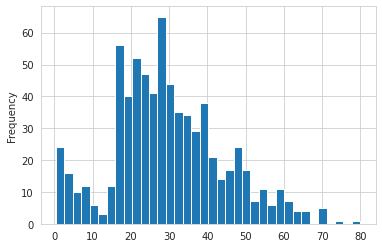

In [35]:
train['Age'].plot.hist(bins=36)

In [36]:
import cufflinks as cf

In [37]:
cf.go_offline()

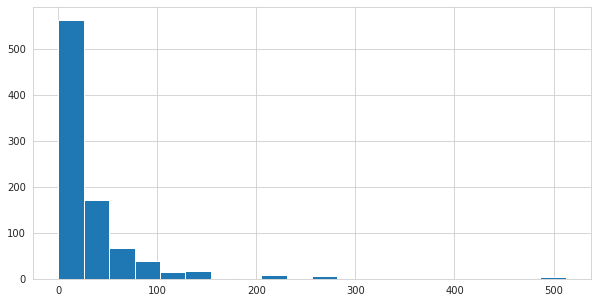

In [38]:
train['Fare'].hist(bins=20,figsize=(10,5))

In [39]:
cf.go_offline()

In [40]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]

    if pd.isnull(Age):
      if Pclass == 1:
        return 37
      if Pclass == 2:
        return 29
      if Pclass == 3:
        return 24
    else:
      return Age
        

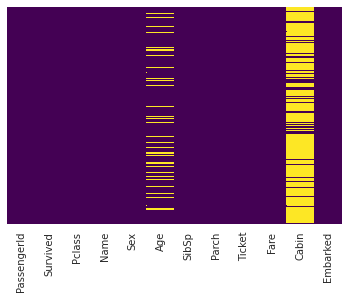

In [41]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [43]:
train.drop('Cabin',axis=1,inplace=True)

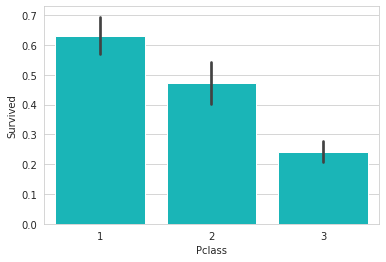

In [57]:
sns.barplot('Pclass', 'Survived', data=train, color="darkturquoise")
plt.show()

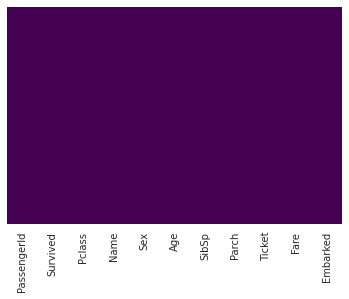

In [44]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
train.dropna(inplace=True)

In [45]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [46]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)


In [47]:
train = pd.concat([train,sex,embark],axis=1)

In [48]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace =True)

In [49]:
X = train.drop(['Survived'],axis=1)
y= train['Survived']#the column we want to predict

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [53]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = logmodel.predict(X_test)
confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [55]:
confusion_matrix(y_test,predictions)

array([[134,  20],
       [ 37,  77]])

In [58]:
#clean the testing data 

test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,sex,embark],axis=1)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace =True)

In [59]:
#training
y = train["Survived"]
features = ["Pclass", "SibSp", "Parch","male","Age","Q","S"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) #RandomForestClassifier
# model = LogisticRegression(max_iter=1000) 
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
# LogisticRegression, Accuracy on Kaggle= 0.76555
# RandomForestClassifier, Accuracy on Kaggle= 0.78468

Your submission was successfully saved!


ValueError: ignored